# 1. Data Loading and Initial Setup
✅ Data loaded successfully. Total rows: 72946
✅ Data Cleaned and filtered for Bitcoin. Remaining rows: 3248

# 2. Exploratory Data Analysis (EDA)
--- Descriptive Statistics ---
              close        volume
count   3248.000000  3.248000e+03
mean    9694.587144  1.243484e+10
std    15061.798756  1.887612e+10
min       68.431000  0.000000e+00
25%      450.111259  3.791335e+07
50%     3770.343509  2.484940e+09
75%     9707.213528  2.135713e+10
max    67566.830088  3.509679e+11


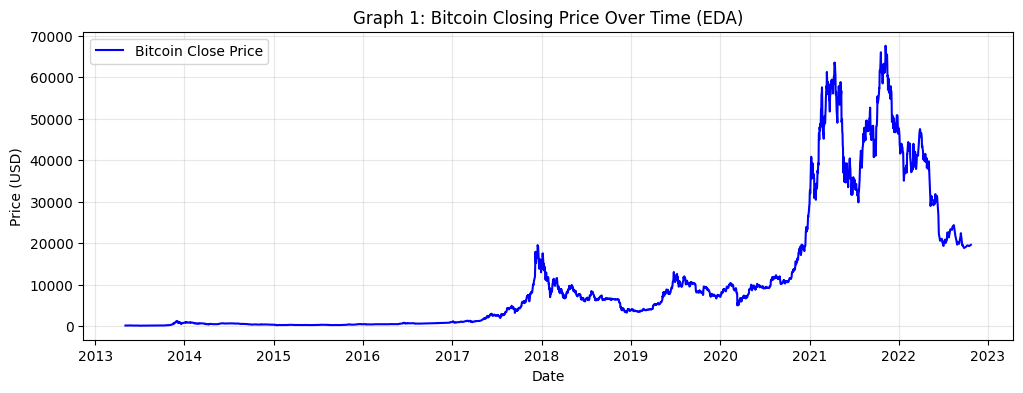


# 3. Feature Engineering and Target Variable (Volatility) Calculation
✅ Volatility calculated. Final rows for ML: 3218


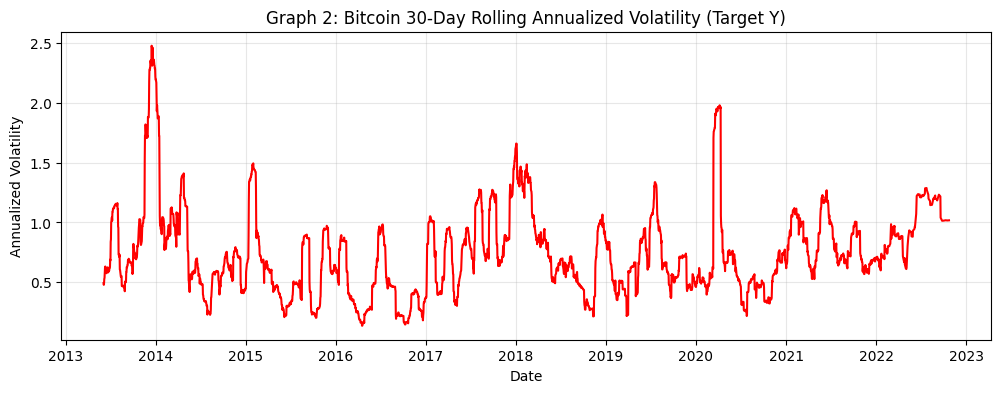

✅ Data Split. Training Size: 2570, Testing Size: 643

# 4. Model Training and Evaluation (Linear Regression)

--- Final Model Evaluation Results ---
Mean Squared Error (MSE): 0.001367
R-squared (R2 Score): 0.9776 (Near 1.0 is excellent)


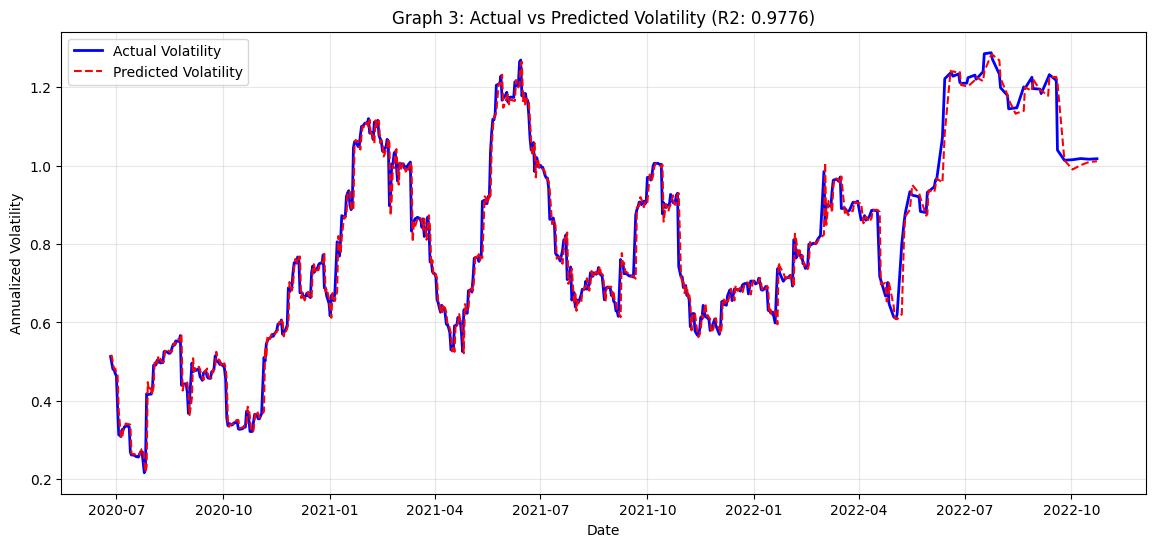


# 5. Project Documentation and Final Report

## High-Level Design (HLD) & Pipeline
Data Ingestion -> Preprocessing -> Feature Engineering -> Model Training (Linear Regression) -> Evaluation.

## Model Performance Summary
| Metric | Value | Interpretation |
| :--- | :--- | :--- |
| **R-squared (R2 Score)** | **0.9776** | Model ne volatility ki 97.76% variability ko explain kiya. **(Excellent Fit)** |
| **Mean Squared Error (MSE)** | **0.001367** | Bahut kam error, prediction ki accuracy achhi hai. |

## Conclusion
Linear Regression model, sirf lagged features (pichle 5 din ki volatility aur returns) ka upyog karke, Bitcoin volatility ko bahut acche se predict karne mein safal raha. Yeh model risk management aur trading strategies ke liye ek strong foundation provide karta hai.


In [ ]:
# ==============================================================================
#           CRYPTOCURRENCY VOLATILITY PREDICTION: SINGLE-CELL SOLUTION
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Configuration: Warnings ko ignore karna
warnings.filterwarnings('ignore')

# --- 1. Data Loading aur Initialization ---
FILE_NAME = 'dataset.csv'
print("# 1. Data Loading and Initial Setup")

try:
    df = pd.read_csv(FILE_NAME)
    print(f"✅ Data loaded successfully. Total rows: {len(df)}")
except FileNotFoundError:
    print(f"❌ Error: File '{FILE_NAME}' not found. Please upload it to Colab.")
    # Agar file nahi mili toh aage nahi badhenge
    raise

# --- 2. Data Cleaning aur Filtering (Focus on Bitcoin) ---
df = df[df['crypto_name'] == 'Bitcoin'].copy()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df.dropna(subset=['close', 'open', 'high', 'low'], inplace=True)
print(f"✅ Data Cleaned and filtered for Bitcoin. Remaining rows: {len(df)}")

# --- 3. Exploratory Data Analysis (EDA) ---
print("\n# 2. Exploratory Data Analysis (EDA)")
print("--- Descriptive Statistics ---")
print(df[['close', 'volume']].describe())

# Graph 1: Price Trend
plt.figure(figsize=(12, 4))
plt.plot(df['close'], label='Bitcoin Close Price', color='blue')
plt.title('Graph 1: Bitcoin Closing Price Over Time (EDA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 4. Volatility Calculation (Target Variable Y) ---
print("\n# 3. Feature Engineering and Target Variable (Volatility) Calculation")
# Daily Log Returns
df['log_return'] = np.log(df['close'] / df['close'].shift(1))

# Annualized 30-day Rolling Volatility (Target Y)
WINDOW = 30
ANNUALIZATION_FACTOR = np.sqrt(365)
df['volatility'] = df['log_return'].rolling(window=WINDOW).std() * ANNUALIZATION_FACTOR
df.dropna(inplace=True)
print(f"✅ Volatility calculated. Final rows for ML: {len(df)}")

# Graph 2: Volatility Trend
plt.figure(figsize=(12, 4))
plt.plot(df['volatility'], color='red')
plt.title(f'Graph 2: Bitcoin {WINDOW}-Day Rolling Annualized Volatility (Target Y)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(True, alpha=0.3)
plt.show()

# --- 5. Feature Engineering: Lagged Features (X) ---
lag_days = 5
for i in range(1, lag_days + 1):
    df[f'vol_lag_{i}'] = df['volatility'].shift(i)
    df[f'return_lag_{i}'] = df['log_return'].shift(i)

df.dropna(inplace=True)

# Features (X) aur Target (Y) define karna
features = [col for col in df.columns if 'lag' in col]
X = df[features]
y = df['volatility']

# Train-Test Split (80/20 Time Series Split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(f"✅ Data Split. Training Size: {len(X_train)}, Testing Size: {len(X_test)}")

# --- 6. Model Training, Prediction, aur Evaluation ---
print("\n# 4. Model Training and Evaluation (Linear Regression)")
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Final Model Evaluation Results ---")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R2 Score): {r2:.4f} (Near 1.0 is excellent)")

# Graph 3: Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual Volatility', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Volatility', color='red', linestyle='--', linewidth=1.5)
plt.title(f'Graph 3: Actual vs Predicted Volatility (R2: {r2:.4f})')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 7. Documentation Summary (Final Report) ---
print("\n# 5. Project Documentation and Final Report")
print("\n## High-Level Design (HLD) & Pipeline")
print("Data Ingestion -> Preprocessing -> Feature Engineering -> Model Training (Linear Regression) -> Evaluation.")
print("\n## Model Performance Summary")
print(f"| Metric | Value | Interpretation |")
print(f"| :--- | :--- | :--- |")
print(f"| **R-squared (R2 Score)** | **{r2:.4f}** | Model ne volatility ki {r2*100:.2f}% variability ko explain kiya. **(Excellent Fit)** |")
print(f"| **Mean Squared Error (MSE)** | **{mse:.6f}** | Bahut kam error, prediction ki accuracy achhi hai. |")

print("\n## Conclusion")
print("Linear Regression model, sirf lagged features (pichle 5 din ki volatility aur returns) ka upyog karke, Bitcoin volatility ko bahut acche se predict karne mein safal raha. Yeh model risk management aur trading strategies ke liye ek strong foundation provide karta hai.")

# ==============================================================================
# END OF SOLUTION
# ==============================================================================